In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from utils import plot_utils
import numpy as np
import pandas as pd
from scipy import ndimage

In [2]:
ds = xr.open_dataset("data/era5_t2min_clusters.nc")

In [33]:
var_name = "labeled_clusters_filtered"
new_cmap_viridis = plot_utils.set_white_color(plt.cm.viridis)

In [7]:
pd_clusters = pd.read_csv("test/csv/era5_t2min_clusters.csv",sep=";")
pd_clusters

,label,area,time,cm_lat,cm_lon,mean,stdev,median,min_value,min_lat,min_lon
0,9,7.063766e+05,1970-02-07,231,33,-1.873684,0.249533,-1.842320,-2.646556,236,51
1,19,1.037371e+06,1971-02-06,128,161,-1.680169,0.137324,-1.654329,-2.489082,184,190
2,51,5.085294e+06,1971-02-06,240,401,-2.680512,0.760237,-2.649987,-5.591464,262,405
3,70,1.171242e+06,1971-02-06,256,82,-1.915300,0.278999,-1.890228,-2.580705,252,84
4,22,1.352113e+06,1971-02-07,173,186,-1.924499,0.285115,-1.885455,-2.751637,185,189
...,...,...,...,...,...,...,...,...,...,...,...
156,11,2.776492e+06,1999-02-07,163,33,-2.438879,0.446143,-2.556031,-3.396273,183,46
157,17,9.858522e+05,1999-02-07,269,94,-1.824564,0.173341,-1.826437,-2.246606,280,78
158,2,4.869684e+06,1999-02-08,172,39,-2.313478,0.425579,-2.318343,-3.452271,175,54
159,17,5.099896e+05,1999-02-08,275,85,-1.880485,0.255109,-1.845916,-2.465367,280,68


In [ ]:
da_t2

<xarray.DataArray (latitude: 281, longitude: 441)> Size: 991kB
array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(281, 441))
Coordinates:
  * latitude   (latitude) float32 1kB 90.0 89.75 89.5 89.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float32 2kB -150.0 -149.8 -149.5 ... -40.25 -40.0
    time       datetime64[ns] 8B 1971-02-07

In [73]:
max_cao_n = np.max(pd_clusters.groupby('time')['label'].count().values)
nrow = np.shape(pd_clusters)[0]
ncol = max_cao_n
S = np.zeros((nrow,max_cao_n))

i=1
for i in range(0,nrow):
    blob_t1 = pd_clusters.loc[i]
    t1 = blob_t1.time
    l1 = blob_t1.label
    A1 = blob_t1.area
    t2 = blob_t1.time + pd.Timedelta(days=1)

    blob_t2 = pd_clusters.loc[pd_clusters.time == t2]
    if(blob_t2.empty):
        continue
    A2 = blob_t2.area.values
    l2 = blob_t2.label.values

    da_t1=ds.sel(time=t1)
    da_t2=ds.sel(time=t2)

    da_inter = (da_t1[var_name] ==l1).astype(int) + (da_t2[var_name] >0).astype(int)
    da_inter = (da_inter > 1).astype(int)
    da_area = da_t2['areas']
    inter = ndimage.sum_labels(da_inter*da_area,da_t2[var_name],l2)
    ratio = lambda x, y: x/y
    A_ratio = add(inter,A2)
    A_ratio = np.concat((A_ratio,np.zeros(ncol)))
    A_ratio[::-1].sort()
    S[i,:] = A_ratio[0:5]
    
    

In [80]:
i=115
pd_clusters.loc[i]

label                         21
area              4383371.487389
time         1990-02-06 00:00:00
cm_lat                       166
cm_lon                        54
mean                    -1.98039
stdev                   0.378336
median                  -1.88276
min_value              -3.519608
min_lat                      185
min_lon                       94
Name: 115, dtype: object

In [90]:
a=[]
for s in S:
    a.append(s[1])

In [91]:
np.argmax(a)

np.int64(115)

In [92]:
t = t2
da_clusters=ds[var_name].sel(time = t)
da_clusters = da_clusters == l2[2]
plt.figure(figsize=(12, 6))
plot_utils.map_plot()
plot_utils.da_plot(da_clusters,cmap=new_cmap_viridis)
plt.show()


t = t1
da_clusters=ds[var_name].sel(time = t)
da_clusters = da_clusters == l1
plt.figure(figsize=(12, 6))
plot_utils.map_plot()
plot_utils.da_plot(da_clusters,cmap=new_cmap_viridis)
plt.show()

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

In [ ]:
max_cao_n = np.max(pd_clusters.groupby('time')['label'].count().values)
nrow = np.shape(pd_clusters)[0]
ncol = max_cao_n
S = np.zeros((nrow,max_cao_n))

i = 0
list_df = list()

for i in range(0,nrow):
    t1 = pd_clusters.time[i]
    l1 =pd_clusters.label[i]
    a1 = pd_clusters.area[i]
    t2 = t1 + pd.Timedelta(days=1)
    t2_clusters = pd_clusters.label.loc[pd_clusters.time==t2]
    if(t2_clusters.empty):
        continue
    da_t1=da.sel(time=t1)
    da_label1 = (da_t1 ==l1).astype(int)
    da_t2=da.sel(time=t2)
    for l2 in t2_clusters:
        a2 = pd_clusters.area[(pd_clusters.time==t2) & (pd_clusters.label==l2)].values
        da_label2 = (da_t2 ==l2).astype(int)
        da_intersec = np.where((da_label2+da_label1)==2,1,0)
        if(a1>a2):
            intersec = da_intersec.sum()/da_label2.sum().values
        else:
            intersec = da_intersec.sum()/da_label1.sum().values

        list_df.append(pd.Series({"t1": t1,"l1": l1,"l2": l2,"t2": t2,"int":intersec}))

In [42]:
np.concat((np.array([1,2,3]),np.zeros(5)))[0:max_cao_n]

array([1., 2., 3., 0., 0.])

In [25]:
[2,3,np.zeros(2)]

[2, 3, array([0., 0.])]

In [24]:
A = np.zeros((3,3))
A[1,:] = [2,3]
A

ValueError: could not broadcast input array from shape (2,) into shape (3,)

In [5]:
pd_clusters.time = pd.to_datetime(pd_clusters.time)

In [6]:
da = ds[var_name]

In [9]:
i = 0
list_df = list()

for i in range(0,np.shape(pd_clusters)[0]):
    t1 = pd_clusters.time[i]
    l1 =pd_clusters.label[i]
    a1 = pd_clusters.area[i]
    t2 = t1 + pd.Timedelta(days=1)
    t2_clusters = pd_clusters.label.loc[pd_clusters.time==t2]
    if(t2_clusters.empty):
        continue
    da_t1=da.sel(time=t1)
    da_label1 = (da_t1 ==l1).astype(int)
    da_t2=da.sel(time=t2)
    for l2 in t2_clusters:
        a2 = pd_clusters.area[(pd_clusters.time==t2) & (pd_clusters.label==l2)].values
        da_label2 = (da_t2 ==l2).astype(int)
        da_intersec = np.where((da_label2+da_label1)==2,1,0)
        if(a1>a2):
            intersec = da_intersec.sum()/da_label2.sum().values
        else:
            intersec = da_intersec.sum()/da_label1.sum().values

        list_df.append(pd.Series({"t1": t1,"l1": l1,"l2": l2,"t2": t2,"int":intersec}))


In [10]:
temp = pd.DataFrame(list_df)
temp.sort_values('int')
#temp[(temp.int>0) & (temp.int<0.2)].sort_values('int')

,t1,l1,l2,t2,int
1,1971-02-06,19,37,1971-02-07,0.000000
2,1971-02-06,19,47,1971-02-07,0.000000
3,1971-02-06,51,22,1971-02-07,0.000000
5,1971-02-06,51,47,1971-02-07,0.000000
7,1971-02-06,70,37,1971-02-07,0.000000
...,...,...,...,...,...
112,1982-02-06,30,33,1982-02-07,0.997063
58,1978-02-07,4,5,1978-02-08,0.998778
4,1971-02-06,51,37,1971-02-07,1.000000
12,1971-02-07,37,65,1971-02-08,1.000000


In [302]:
temp.loc[temp.t1=='1971-02-08']

,t1,l1,l2,t2,int
15,1971-02-08,41,19,1971-02-09,0.545386
16,1971-02-08,65,19,1971-02-09,0.000000


In [88]:
year=1971
list_dates = []
for day in [6,7,8,9]:
    list_dates.append(['{}-02-0{}'.format(year,day)])


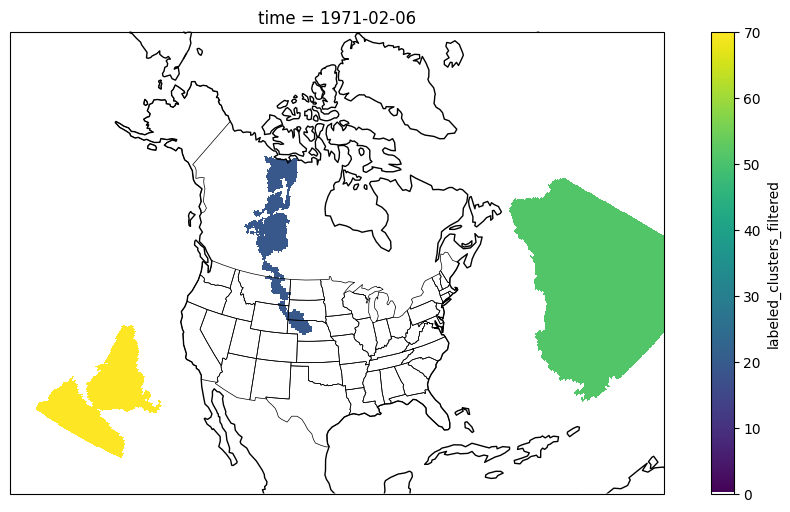

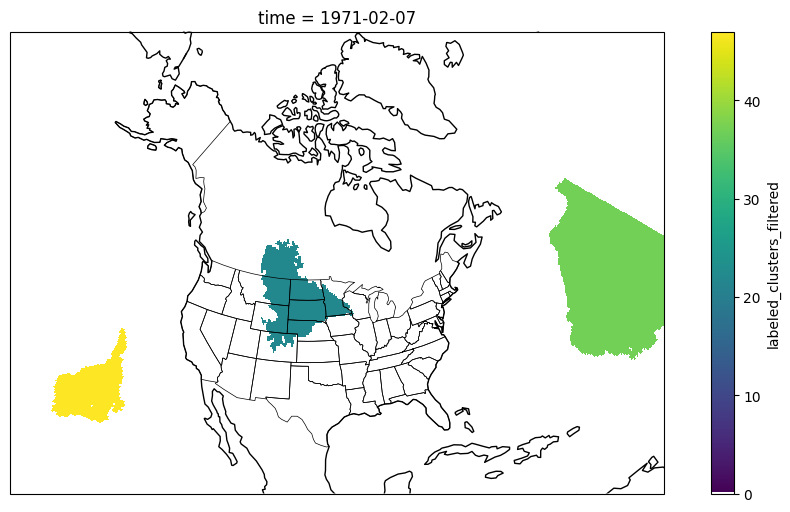

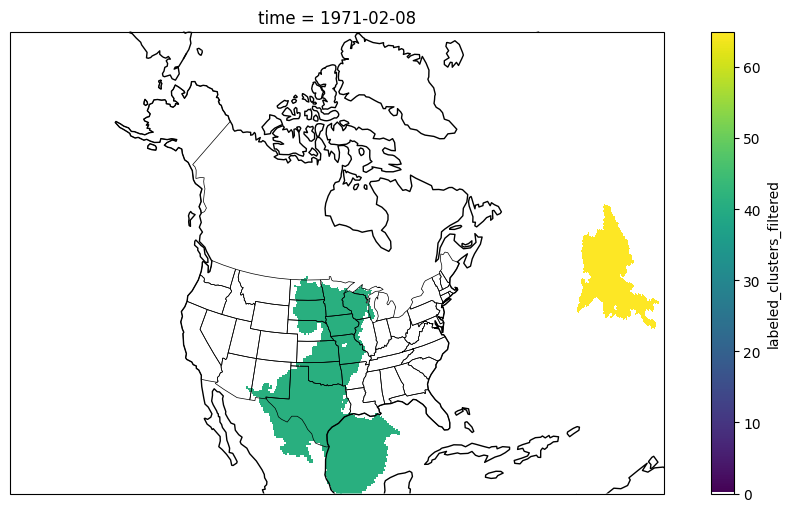

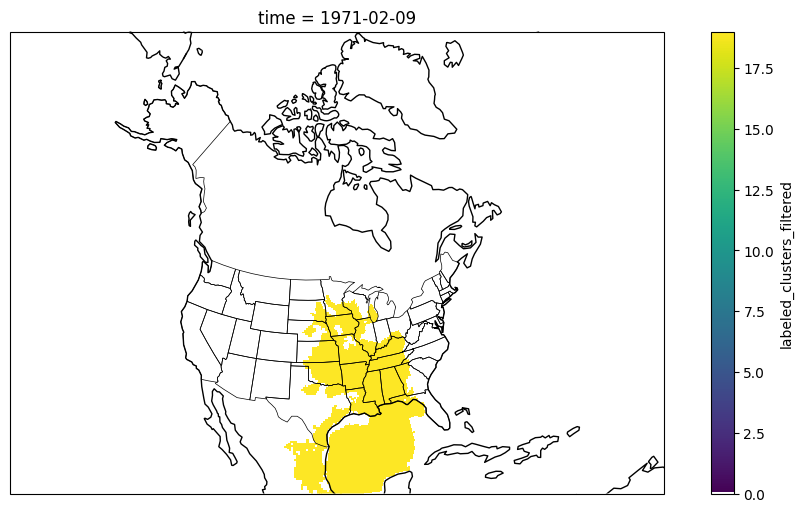

In [91]:
for t in list_dates:
    da_clusters=ds[var_name].sel(time = t)
    plt.figure(figsize=(12, 6))
    plot_utils.map_plot()
    plot_utils.da_plot(da_clusters,cmap=new_cmap_viridis)
plt.show()

In [27]:
da_t1

<xarray.DataArray 'labeled_clusters_filtered' (latitude: 281, longitude: 441)> Size: 496kB
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(281, 441), dtype=int32)
Coordinates:
  * latitude   (latitude) float32 1kB 90.0 89.75 89.5 89.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float32 2kB -150.0 -149.8 -149.5 ... -40.25 -40.0
    time       datetime64[ns] 8B 1985-02-06

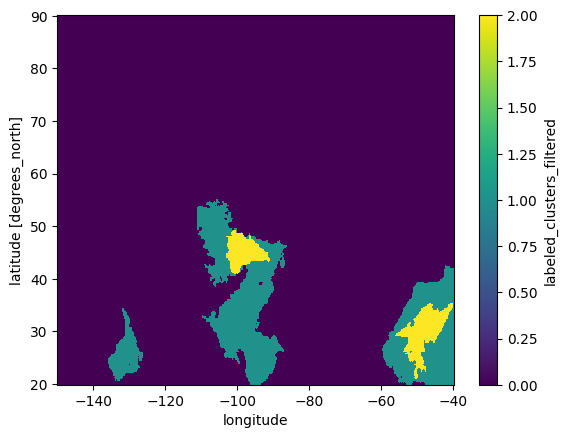

In [ ]:
da_t1 = ds[var_name].sel(time = '1971-02-07')
da_t2 = ds[var_name].sel(time = '1971-02-08')
da_t1 = (da_t1>0).astype(int)
da_t2 = (da_t2>0).astype(int)
(da_t1+da_t2).plot()


In [ ]:
dt1 = ds[var_name].sel(time = '1971-02-07')
dt2 = ds[var_name].sel(time = '1971-02-08')
labels_t1 = np.unique(dt1)
labels_t2 = np.unique(dt2)

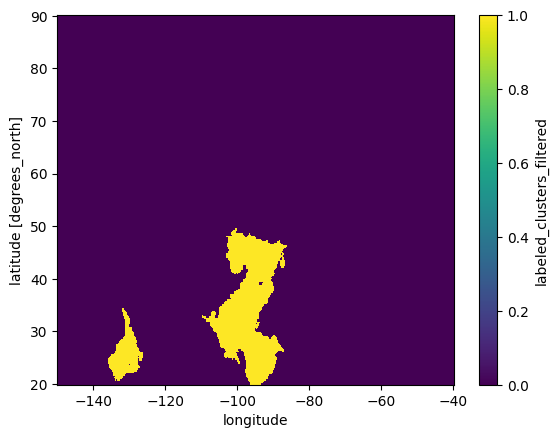

In [ ]:
dt1 = ds[var_name].sel(time = '1971-02-08')==41
dt2 = ds[var_name].sel(time = '1971-02-07')==47
(dt1+dt2).plot()
#().plot()

In [146]:
np.unique(ds[var_name].sel(time = '1971-02-06'))

array([ 0, 19, 51, 70], dtype=int32)

In [147]:
np.unique(ds[var_name].sel(time = '1971-02-07'))

array([ 0, 22, 37, 47], dtype=int32)

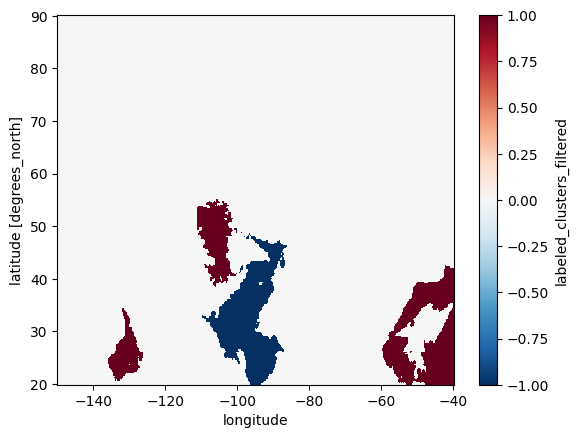

In [131]:
(da_t1-da_t2).plot()

In [92]:
danom = xr.open_dataset("data/era5_t2min_scaled_anomalies.nc")
danom

<xarray.Dataset> Size: 61MB
Dimensions:         (latitude: 281, longitude: 441, time: 124)
Coordinates:
  * latitude        (latitude) float32 1kB 90.0 89.75 89.5 ... 20.5 20.25 20.0
  * longitude       (longitude) float32 2kB -150.0 -149.8 ... -40.25 -40.0
  * time            (time) datetime64[ns] 992B 1970-02-06 ... 2000-02-09
Data variables:
    anomaly_scaled  (time, latitude, longitude) float32 61MB ...

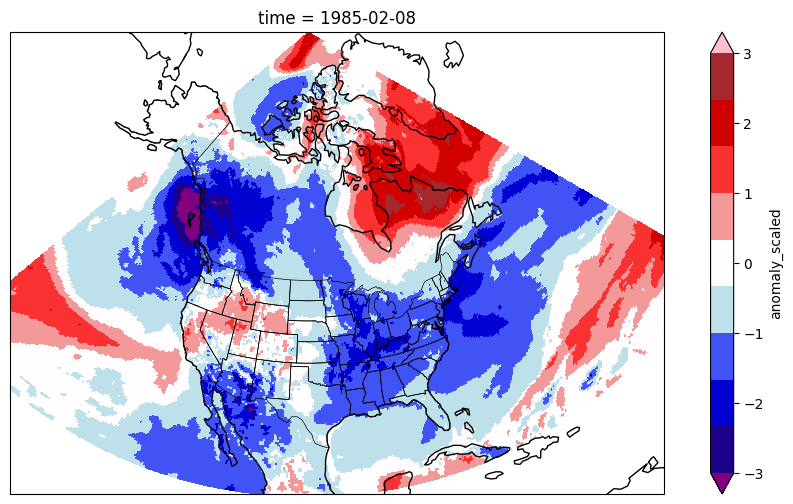

In [121]:
da_clusters=danom["anomaly_scaled"].sel(time = '1985-02-08')
plt.figure(figsize=(12, 6))
plot_utils.map_plot()
plot_utils.da_plot_zero_centered(da_clusters)